# Categorización de noticias

## Preguntas a responder con el anális
- ¿Se pueden catalogar las noticias con la descripción y los titulares? Compare su clasificación con las categorías incluidas en el set de datos.
- ¿Existen estilos de escritura asociados a cada categoría?
- ¿Qué se puede decir de los autores?
- ¿Qué información útil se puede extraer de los datos?

### Análisis exploratorio y carga de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.contrib import learn
import tensorflow as tf
import string
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
session = tf.Session()

In [2]:
df = pd.read_json("../Data/News_Category_Dataset_v2.json", lines = True, convert_dates = True)

In [3]:
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [4]:
df.describe()

,authors,category,date,headline,link,short_description
count,200853,200853,200853,200853,200853,200853
unique,27993,41,2309,199344,200812,178353
top,,POLITICS,2013-01-17 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://stylenews...,
freq,36620,32739,100,90,2,19712
first,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


### Variable category

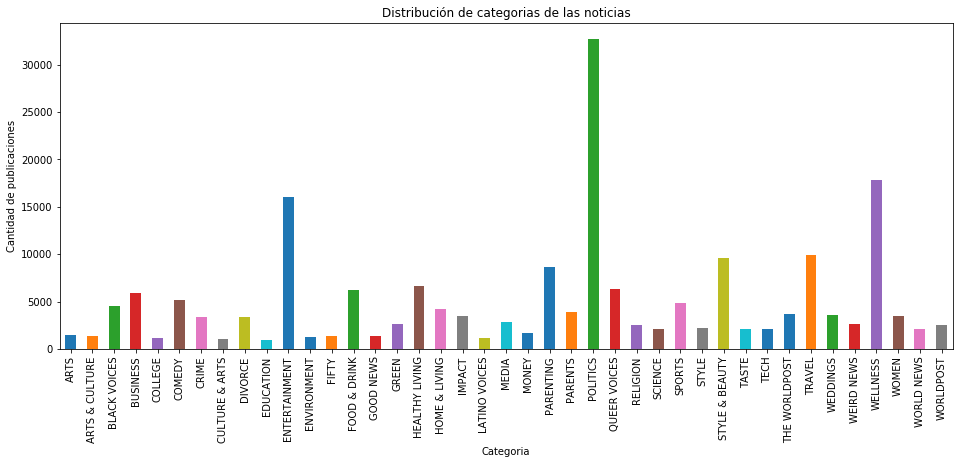

In [5]:
plt.figure(figsize=(16,6)) # tamaño del plot
df.groupby('category').link.count().plot.bar(ylim=0)
plt.xlabel("Categoria")
plt.ylabel("Cantidad de publicaciones")
plt.title("Distribución de categorias de las noticias")
plt.show()   

In [6]:
uni_c = df["category"].nunique()
len_c =len(df["category"])
len(df)
print("Se tienen {} categorias, y no tienen datos faltantes {} observaciones".format(uni_c, len_c))

Se tienen 41 categorias, y no tienen datos faltantes 200853 observaciones


In [7]:
c1 = len(df[df['category'] == 'ENTERTAINMENT'])
c2 = len(df[df['category'] == 'POLITICS'])
c3 = len(df[df['category'] == 'WORLDPOST'])
print("ENTERTAINMENT = {} noticias, POLITICS = {} noticias, WORLDPOST = {}".format(c1, c2, c3))

ENTERTAINMENT = 16058 noticias, POLITICS = 32739 noticias, WORLDPOST = 2579


In [8]:
p = (c1 + c2 + c3)/len(df)*100
p = np.round(p, 2)
print("Las categorias ENTERTAINMENT, POLITICS y WORLDPOST son el {} % de las noticias,".format(p))
print("un total de {} noticias".format(c1 + c2 + c3))

Las categorias ENTERTAINMENT, POLITICS y WORLDPOST son el 25.58 % de las noticias,
un total de 51376 noticias


La variable **category** tiene 41 categorias pero nos estan distribuidas de manera uniforme *ENTERTAINMENT*, *POLITICS* y *WORLDPOST* tienen el 25.58% de todas las noticias

In [9]:
top_category = pd.DataFrame(pd.value_counts(df['category']))
top_category['Cat'] = top_category.index # organizar top categorias
top_category = top_category.reset_index(drop = True)
top_category.columns = ['Frecuencia', 'Categoria']
top_category = top_category.iloc[0:9]
top_category

,Frecuencia,Categoria
0,32739,POLITICS
1,17827,WELLNESS
2,16058,ENTERTAINMENT
3,9887,TRAVEL
4,9649,STYLE & BEAUTY
5,8677,PARENTING
6,6694,HEALTHY LIVING
7,6314,QUEER VOICES
8,6226,FOOD & DRINK


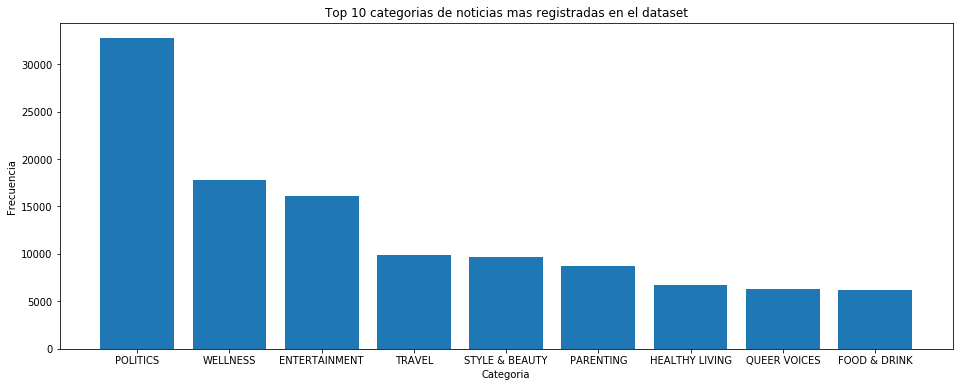

In [10]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(top_category.Categoria, top_category.Frecuencia)
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')
plt.title('Top 10 categorias de noticias mas registradas en el dataset')
plt.show()

### Variable  authors

In [11]:
df["authors"].nunique()

27993

In [12]:
pd.value_counts(df['authors'])

                                                                                                         36620
Lee Moran                                                                                                 2423
Ron Dicker                                                                                                1913
Reuters, Reuters                                                                                          1562
Ed Mazza                                                                                                  1322
Cole Delbyck                                                                                              1140
Andy McDonald                                                                                             1068
Julia Brucculieri                                                                                         1059
Carly Ledbetter                                                                                           1054
C

In [13]:
top_authors = pd.DataFrame(pd.value_counts(df['authors']))
top_authors['Aut'] = top_authors.index # organizar top categorias
top_authors = top_authors.reset_index(drop = True)
top_authors.columns = ['Frecuencia', 'authors']
top_authors = top_authors.iloc[0:11]
top_authors

,Frecuencia,authors
0,36620,
1,2423,Lee Moran
2,1913,Ron Dicker
3,1562,"Reuters, Reuters"
4,1322,Ed Mazza
5,1140,Cole Delbyck
6,1068,Andy McDonald
7,1059,Julia Brucculieri
8,1054,Carly Ledbetter
9,1020,Curtis M. Wong


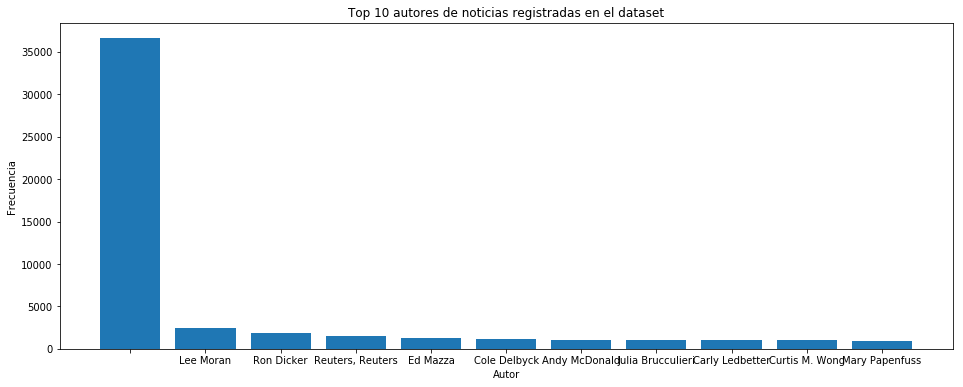

In [14]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(top_authors.authors, top_authors.Frecuencia)
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Top 10 autores de noticias registradas en el dataset')
plt.show()

In [15]:
pd.value_counts(df['authors'] == '')

False    164233
True      36620
Name: authors, dtype: int64

In [16]:
36620/ len(df)

0.18232239498538733

En el análisis se puede observar que se tienen **36620** registros sin el autor esto equivale al **18.23%** del total de los articulos por esta razón se procede a visualizar los datos sin tener en cuenta los valores que no tienen el autor

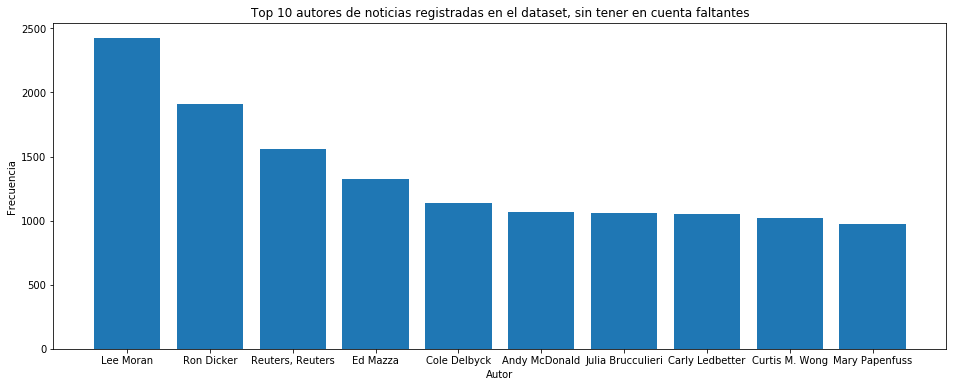

In [17]:
top_authors_nw = top_authors.iloc[1:12] # no se seleccionan los datos sin autor
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(top_authors_nw.authors, top_authors_nw.Frecuencia)
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Top 10 autores de noticias registradas en el dataset, sin tener en cuenta faltantes')
plt.show()

### Variable date

In [18]:
date = pd.DataFrame(df['date'])
date.head()

,date
0,2018-05-26
1,2018-05-26
2,2018-05-26
3,2018-05-26
4,2018-05-26


In [19]:
type(date)

pandas.core.frame.DataFrame

In [20]:
date['Freq'] = 1
date.index = date['date'] 
date = date.drop(columns=['date'])
date.head()

,Freq
date,
2018-05-26,1
2018-05-26,1
2018-05-26,1
2018-05-26,1
2018-05-26,1


In [21]:
date_res_d = date.resample('D').count() # resample por día
date_res_d.head()

,Freq
date,
2012-01-28,66
2012-01-29,65
2012-01-30,100
2012-01-31,100
2012-02-01,100


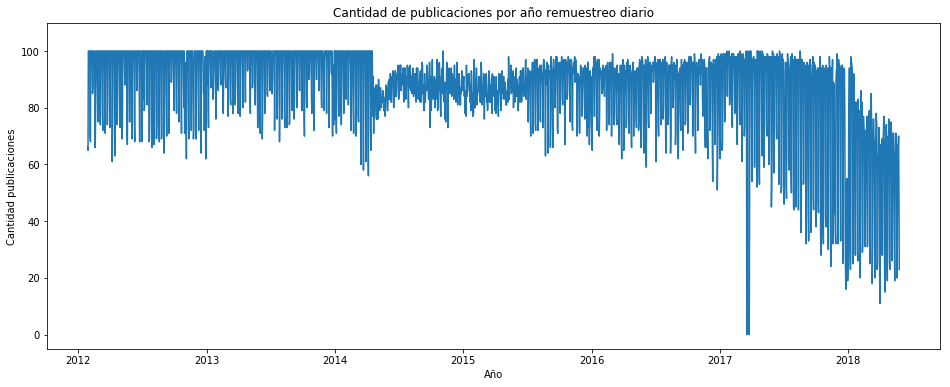

In [22]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.plot(date_res_d)
plt.xlabel('Año')
plt.ylabel('Cantidad publicaciones')
plt.title('Cantidad de publicaciones por año remuestreo diario')
plt.ylim([-5, 110])
plt.show()

In [23]:
date_res_m = date.resample('MS').count() # resample por mes
date_res_m.head()

,Freq
date,
2012-01-01,331
2012-02-01,2693
2012-03-01,2880
2012-04-01,2769
2012-05-01,2899


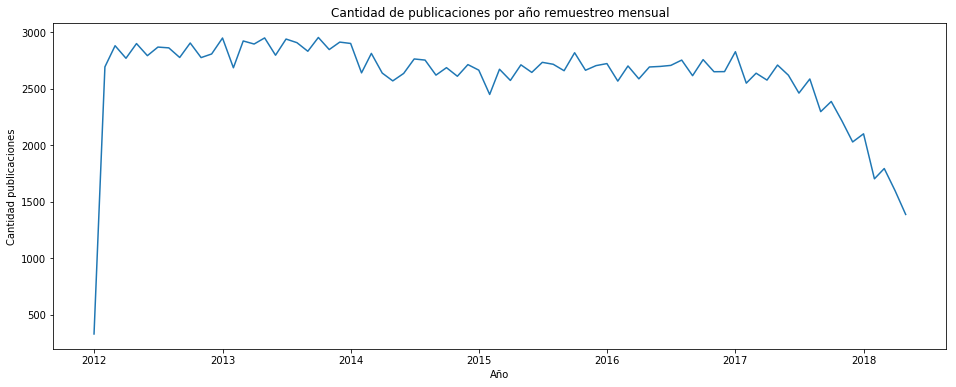

In [24]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.plot(date_res_m)
plt.xlabel('Año')
plt.ylabel('Cantidad publicaciones')
plt.title('Cantidad de publicaciones por año remuestreo mensual')
#plt.ylim([100, 700])
plt.show()

#### Frecuencias de la variable date por mes y por día

In [25]:
# buscar frecuendia por mes y por día
date_t = pd.DataFrame(df['date'])

In [26]:
date_t['Mes'] = pd.DatetimeIndex(date_t['date']).month_name()
date_t.head()

,date,Mes
0,2018-05-26,May
1,2018-05-26,May
2,2018-05-26,May
3,2018-05-26,May
4,2018-05-26,May


In [27]:
date_t_group = date_t
date_t_group = date_t_group.groupby(['Mes']).count()
date_t_group['Meses'] = date_t_group.index
date_t_group = date_t_group.reset_index(drop = True)
date_t_group

,date,Meses
0,17635,April
1,16576,August
2,15816,December
3,17286,February
4,16493,January
5,16470,July
6,16183,June
7,18418,March
8,17917,May
9,15756,November


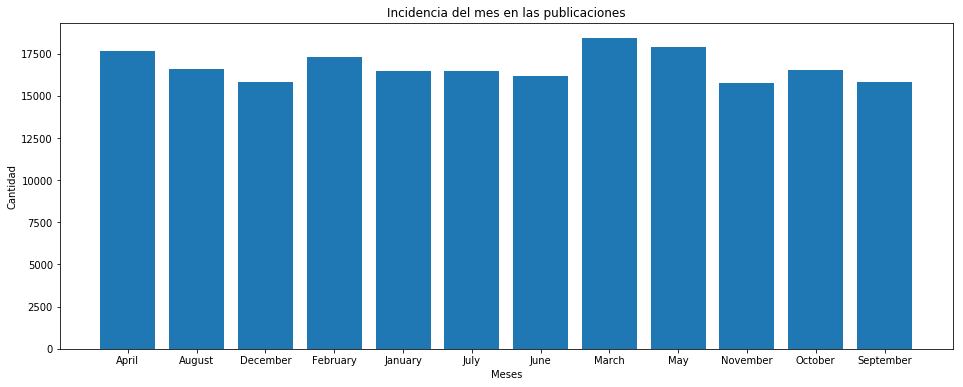

In [28]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(date_t_group.Meses, date_t_group.date)
plt.xlabel('Meses')
plt.ylabel('Cantidad')
plt.title('Incidencia del mes en las publicaciones')
plt.show()

In [29]:
mayor = date_t_group.date.max() 
menor = date_t_group.date.min()
rango = mayor - menor
print("El mayor valor de publicaciones sumando los meses es: {} y el menor es : {}, para un rango de {}".
      format(mayor, menor, rango))

El mayor valor de publicaciones sumando los meses es: 18418 y el menor es : 15756, para un rango de 2662


Con respecto a esta variable no se puede ver una estacionalidad clara ni un mes en el que sea mayor la incidencia de publicaciones el rango es de 2662

### Variables authors &	category	

In [30]:
top_authors_nw.head()

,Frecuencia,authors
1,2423,Lee Moran
2,1913,Ron Dicker
3,1562,"Reuters, Reuters"
4,1322,Ed Mazza
5,1140,Cole Delbyck


In [31]:
aut_cat = pd.merge(top_authors_nw, df) # joint de los datos en funcion de el top 10 de los autores

In [32]:
top = len(aut_cat)
all_pub = len(df)
aut_porcent = np.round(((top/all_pub) * 100), 2)
print("El top 10 de autores producen el {}% del total de los articulos".format(aut_porcent))

El top 10 de autores producen el 6.74% del total de los articulos


In [33]:
aut_cat.Frecuencia = 1
aut_cat.head()

,Frecuencia,authors,category,date,headline,link,short_description
0,1,Lee Moran,COMEDY,2018-05-24,'Late Night' Writer's Breathless Royal Wedding...,https://www.huffingtonpost.com/entry/royal-wed...,"“Then he bites his lip, like, ‘Hmm, girl.’”"
1,1,Lee Moran,COMEDY,2018-05-24,Seth Meyers Gives Donald Trump Some Valuable M...,https://www.huffingtonpost.com/entry/seth-meye...,"“Stop trying to make ‘Fetch’ happen."""
2,1,Lee Moran,POLITICS,2018-05-24,Chrissy Teigen Taunts Donald Trump Over Twitte...,https://www.huffingtonpost.com/entry/chrissy-t...,"Other tweeters, including Mexico's former pres..."
3,1,Lee Moran,COMEDY,2018-05-24,Samantha Bee Torches ICE: 'Let's Shut It The F...,https://www.huffingtonpost.com/entry/samantha-...,"""I’m serious. It’s awful. And we don’t actuall..."
4,1,Lee Moran,MEDIA,2018-05-24,Jake Tapper Shreds Donald Trump With A Long Li...,https://www.huffingtonpost.com/entry/jake-tapp...,"""I could go on, but this is just an hour show."""


Con respecto a estas dos variables se puede ver que el top de los 10 primeros autores en publicar artículos solo cubren el 6.74% de todas las publicaciones, el peso de las publicaciones que no tienen autores es del 18.23% con 36620 publicaciones con la observación de la variable authors en blanco, esto hace que el 75.03% de las publicaciones tengan una variabilidad muy alta en cuanto a autores lo cual dificulta analiza esta variable

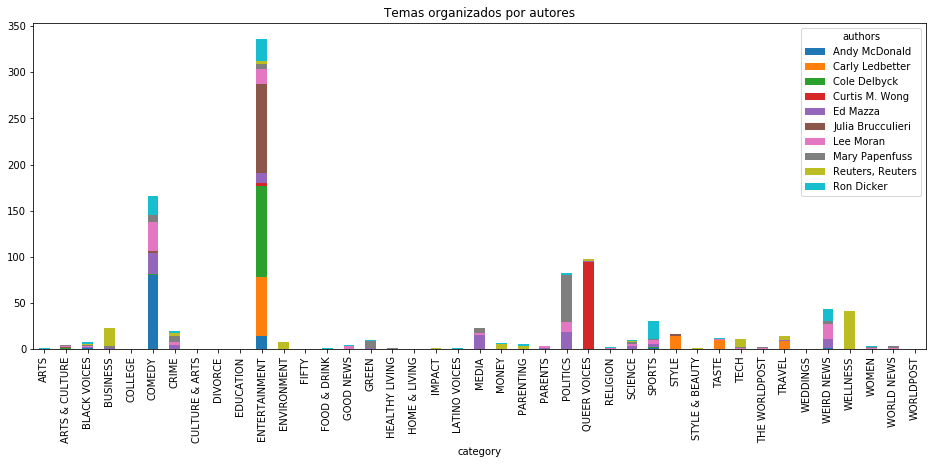

In [34]:
plot = pd.crosstab(index = aut_cat['category'],
            columns = aut_cat['authors'] # tabla de frecuencias por categoria 
                  ).apply(lambda r: r/r.sum() * 100, # promedio ponderado categorias
                          axis=0).plot(kind='bar', stacked=True, 
                                       figsize = (16, 6),
                                       title = "Temas organizados por autores"                                       
                                      )

Se puede observar en los datos que los temas donde se publican mas noticias no son los mismo de los autores que mas publican, el top 10 de autores en publicar publican en la categoria ENTRERTAINMENT, esto hace mas desvalanceados los datos y al publicar un articulo en con estos datos la mayor porbabilidad es que sea de politica pero no de un autor del top 10

### Variables  authors, category & date

In [35]:
aut_cat['Año'] = pd.DatetimeIndex(aut_cat['date']).year

In [36]:
aut_cat.head()

,Frecuencia,authors,category,date,headline,link,short_description,Año
0,1,Lee Moran,COMEDY,2018-05-24,'Late Night' Writer's Breathless Royal Wedding...,https://www.huffingtonpost.com/entry/royal-wed...,"“Then he bites his lip, like, ‘Hmm, girl.’”",2018
1,1,Lee Moran,COMEDY,2018-05-24,Seth Meyers Gives Donald Trump Some Valuable M...,https://www.huffingtonpost.com/entry/seth-meye...,"“Stop trying to make ‘Fetch’ happen.""",2018
2,1,Lee Moran,POLITICS,2018-05-24,Chrissy Teigen Taunts Donald Trump Over Twitte...,https://www.huffingtonpost.com/entry/chrissy-t...,"Other tweeters, including Mexico's former pres...",2018
3,1,Lee Moran,COMEDY,2018-05-24,Samantha Bee Torches ICE: 'Let's Shut It The F...,https://www.huffingtonpost.com/entry/samantha-...,"""I’m serious. It’s awful. And we don’t actuall...",2018
4,1,Lee Moran,MEDIA,2018-05-24,Jake Tapper Shreds Donald Trump With A Long Li...,https://www.huffingtonpost.com/entry/jake-tapp...,"""I could go on, but this is just an hour show.""",2018


In [37]:
Años_pub = aut_cat.Año.unique()
Años_pub

array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

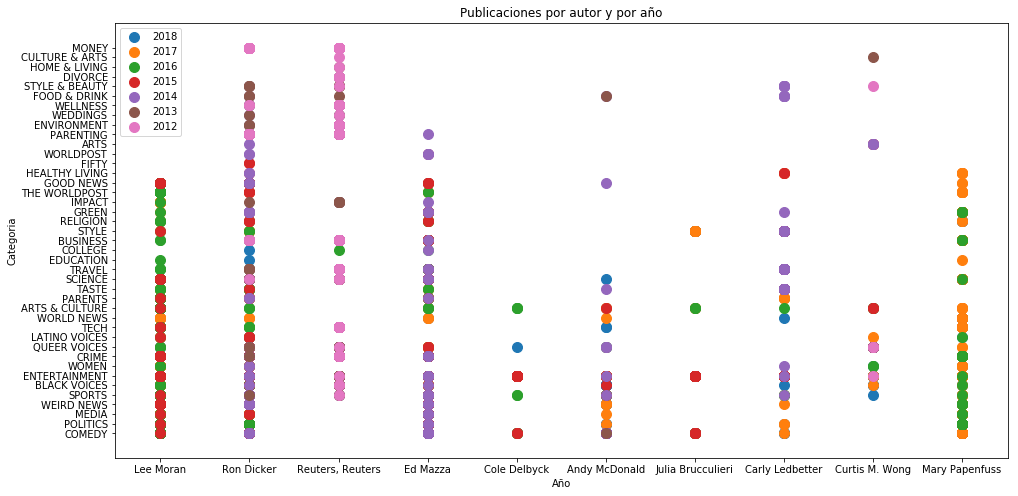

In [38]:
plt.figure(figsize=(16,8)) # tamaño del plot
for i in Años_pub:
    f = aut_cat[aut_cat['Año'] == i]
    plt.scatter(f.authors, f.category, label = i, s = 100)
    plt.legend(loc = 'upper left')
    plt.title("Publicaciones por autor y por año")
    plt.xlabel("Año")
    plt.ylabel("Categoria")    

Con respecto a estas tres variables se puede observar como los autores que mas publican no son tan especializados y algunos no son tan activos en los diferentes años

## Procesaminto de lenguaje natural de los datos

### Alistamiento de los datos para determinar categoría según descripción y los titulares

In [39]:
df_class = df[['category', 'headline', 'short_description']]
df_class.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [40]:
df_class_joint = df_class

In [41]:
p = df_class.headline + df_class.short_description
df_class_joint['Texto'] = p
df_class_joint = df_class_joint.drop(columns=['headline','short_description'])
df_class_joint.head()

/home/oscar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,category,Texto
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [42]:
len(df_class_joint)

200853

In [43]:
texts = df_class_joint['Texto']
texts

0         There Were 2 Mass Shootings In Texas Last Week...
1         Will Smith Joins Diplo And Nicky Jam For The 2...
2         Hugh Grant Marries For The First Time At Age 5...
3         Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4         Julianna Margulies Uses Donald Trump Poop Bags...
5         Morgan Freeman 'Devastated' That Sexual Harass...
6         Donald Trump Is Lovin' New McDonald's Jingle I...
7         What To Watch On Amazon Prime That’s New This ...
8         Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9         What To Watch On Hulu That’s New This WeekYou'...
10        Justin Timberlake Visits Texas School Shooting...
11        South Korean President Meets North Korea's Kim...
12        With Its Way Of Life At Risk, This Remote Oyst...
13        Trump's Crackdown On Immigrant Parents Puts Mo...
14        'Trump's Son Should Be Concerned': FBI Obtaine...
15        Edward Snowden: There's No One Trump Loves Mor...
16        Booyah: Obama Photographer Hil

In [44]:
texts = [x.lower() for x in texts] # Convertir los textos a minúscula
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts] # Eliminamos signos de puntuación
texts = [''.join(c for c in x if c not in '0123456789') for x in texts] # Eliminamos los números
texts = [' '.join(x.split()) for x in texts] # Eliminar espacios en blanco y separadores extras

In [45]:
texts

['there were mass shootings in texas last week but only on tvshe left her husband he killed their children just another day in america',
 'will smith joins diplo and nicky jam for the world cups official songof course it has a song',
 'hugh grant marries for the first time at age the actor and his longtime girlfriend anna eberstein tied the knot in a civil ceremony',
 'jim carrey blasts castrato adam schiff and democrats in new artworkthe actor gives dems an asskicking for not fighting hard enough against donald trump',
 'julianna margulies uses donald trump poop bags to pick up after her dogthe dietland actress said using the bags is a really cathartic therapeutic moment',
 'morgan freeman devastated that sexual harassment claims could undermine legacyit is not right to equate horrific incidents of sexual assault with misplaced compliments or humor he said in a statement',
 'donald trump is lovin new mcdonalds jingle in tonight show bitits catchy all right',
 'what to watch on amazon 

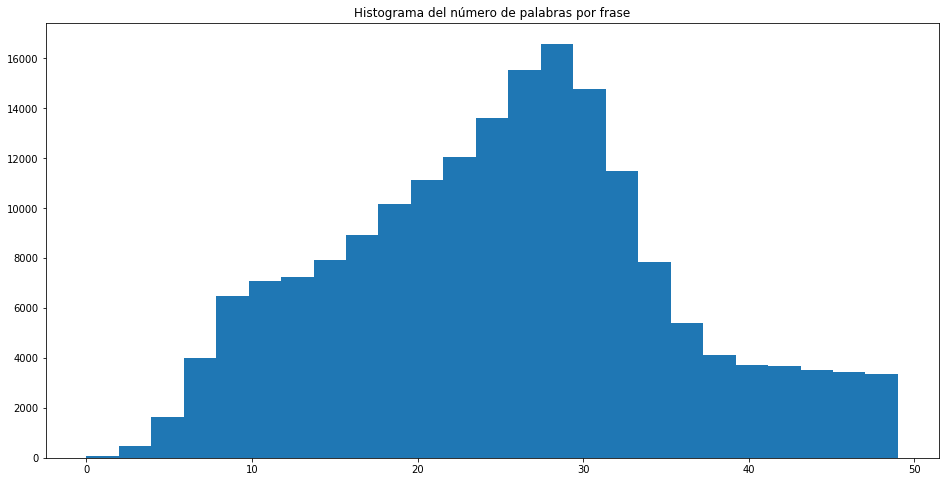

In [46]:
plt.figure(figsize=(16,8)) # tamaño del plot
texts_lengths = [len(x.split()) for x in texts]
texts_lengths = [x for x in texts_lengths if x < 50]
plt.hist(texts_lengths, bins=25)
plt.title("Histograma del número de palabras por frase")
plt.show()

In [47]:
sentence_size = 48
min_word_freq = 3

In [48]:
vocab_processor = learn.preprocessing.VocabularyProcessor(sentence_size, min_frequency=min_word_freq)
vocab_processor.fit_transform(texts)
transformed_texts = np.array([x for x in vocab_processor.transform(texts)])
embedding_size = len(np.unique(transformed_texts))

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [49]:
embedding_size

41732

In [50]:
transformed_texts # texto como bag of words

array([[   79,    72,  1210, ...,     0,     0,     0],
       [   40,  1513,  2713, ...,     0,     0,     0],
       [ 5744,  5063,  7453, ...,     0,     0,     0],
       ...,
       [ 4045,    73,  4914, ...,     0,     0,     0],
       [29305,  1513,   991, ...,     0,     0,     0],
       [15718,  4478,  3415, ...,     0,     0,     0]])

In [51]:
category_text = np.array(df_class_joint.category)

In [52]:
category_text

array(['CRIME', 'ENTERTAINMENT', 'ENTERTAINMENT', ..., 'SPORTS', 'SPORTS',
       'SPORTS'], dtype=object)

In [53]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(category_text)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target = onehot_encoder.fit_transform(integer_encoded)

/home/oscar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [54]:
integer_encoded[0]

array([6])

In [55]:
label_encoder.classes_

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
       'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN',
       'WORLD NEWS', 'WORLDPOST'], dtype=object)

In [56]:
target[0] # categorias como one hot

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

### Partición de los datos

In [57]:
train_idx = np.random.choice(len(texts), round(len(texts)*0.8), replace=False) # 80% train el resto test
test_idx = np.array(list(set(range(len(texts)))-set(train_idx)))

texts_train = [x for ix, x in enumerate(texts) if ix in train_idx]
texts_test = [x for ix, x in enumerate(texts) if ix in test_idx]
target_train = [x for ix, x in enumerate(target) if ix in train_idx ]
target_test = [x for ix, x in enumerate(target) if ix in test_idx]

KeyboardInterrupt: 

## Modelo 